<a href="https://colab.research.google.com/github/yohanesnuwara/reservoir-engineering/blob/master/Unit%207%20Introduction%20to%20Well-Test%20Analysis/notebook/7_examples_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unit 7 Introduction to Well-Test Analysis (Part 2)**

The **Part 1** of **Unit 7** notebook contains **2 of 6 flow test types** (Chap 7.6 and 7.7)

The overall types of well-test types are:
* Constant-Rate Flow Tests (Chap 7.2)
* Multirate Flow Tests (Chap 7.3)
* Constant-Pressure Flow Tests (Chap 7.4)
* Constant-Rate Pressure Buildup Tests (Chap 7.5)
* Multirate Buildup Tests (Chap 7.6)
* Buildup Analysis of Finite-Acting Wells (Chap 7.7)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
!git clone https://www.github.com/yohanesnuwara/reservoir-engineering

Cloning into 'reservoir-engineering'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 558 (delta 8), reused 0 (delta 0), pack-reused 535
Receiving objects: 100% (558/558), 1.51 MiB | 11.46 MiB/s, done.
Resolving deltas: 100% (231/231), done.


## **Chapter 7.6 Multirate Buildup Tests**

### Example 7.5 Multirate Buildup Test

(0, 26)

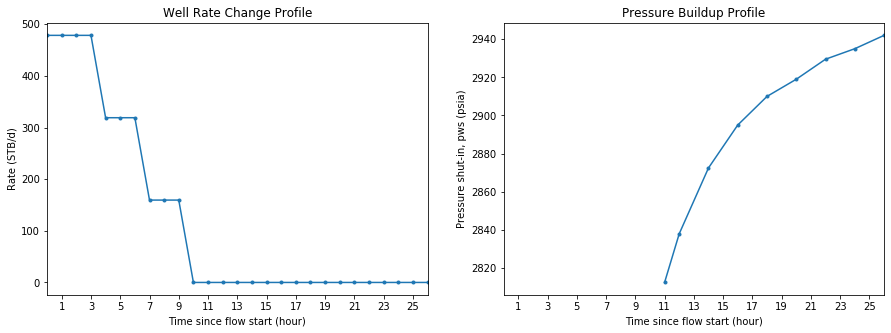

In [38]:
"Task. determine permeability-thickness product (kh) and initial pressure (pi)"

# known: buildup (shut-in) is preceded by multirate tests

mu_oil = 0.6

time = [0, 3, 6, 9, 26] # time at j=0, 1, 2, 3, 4
q = [0, 478.5, 319, 159.5, 0] # rate times Bo (in unit RB/d, because RB/STB*STB/d), at time 4 = 0 RB/d
time_shut = time[3] # time when shut-in

# time in the data is time after shut-in
multirate_buildup = pd.read_csv('/content/reservoir-engineering/Unit 7 Introduction to Well-Test Analysis/data/Table 7.9-Multirate-Buildup-Test Data Example 7.5.csv')

# visualize rate change before shut-in
time_arr = np.arange(0, 27, 1)
q_arr = []
for i in range(len(time_arr)):
  if i >= time[0] and i <= time[1]:
    rate = q[1]
    q_arr.append(float(rate))
  if i > time[1] and i <= time[2]:
    rate = q[2]
    q_arr.append(float(rate))
  if i > time[2] and i <= time[3]:
    rate = q[3]
    q_arr.append(float(rate))
  if i > time[3] and i <= time[4]:
    rate = q[4]
    q_arr.append(float(rate))

time_since = multirate_buildup.t + time_shut

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(time_arr, q_arr, '.-')
plt.title('Well Rate Change Profile')
plt.xlabel('Time since flow start (hour)'); plt.ylabel('Rate (STB/d)')
plt.xticks(np.arange(1, 27, 2))
plt.xlim(0, 26)

# plot buildup pressure transient profile
plt.subplot(1, 2, 2)
plt.plot(time_since, multirate_buildup.p, '.-')
plt.title('Pressure Buildup Profile')
plt.xlabel('Time since flow start (hour)'); plt.ylabel('Pressure shut-in, pws (psia)')
plt.xticks(np.arange(1, 27, 2))
plt.xlim(0, 26)

Text(0, 0.5, 'Pressure shut-in, pws (psia)')

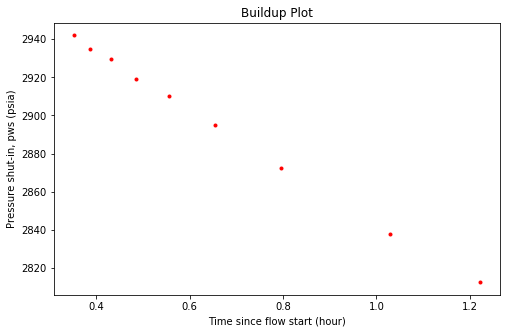

In [35]:
first_term = (q[1] / q[3]) * np.log10(time_since / (time_since - time[1]))
second_term = (q[2] / q[3]) * np.log10((time_since - time[1]) / (time_since - time[2]))
third_term = (q[3] / q[3]) * np.log10((time_since - time[2]) / (time_since - time[3]))
sigma = first_term + second_term + third_term # result is similar to Table 7.10, the Multirate Buildup Plotting Function

plt.figure(figsize=(8, 5))

plt.plot(sigma, multirate_buildup.p, '.', color='r')
plt.title('Buildup Plot')
plt.xlabel('Time since flow start (hour)'); plt.ylabel('Pressure shut-in, pws (psia)')
# plt.xticks(np.arange(1, 27, 2))
# plt.xlim(0, 26)

In [36]:
# linear regression the buildup plot

x6 = sigma
y6 = multirate_buildup.p

def regression(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 

c6, m6 = regression(x6, y6)
pi = c6 # initial pressure equals to intercept c5
print("Slope of linear-region Horner plot:", m6)
print("Intercept of linear-region Horner plot:", c6, "psia")
print("The initial reservoir pressure equals to the intercept:", pi, "psia")

Slope of linear-region Horner plot: -149.44284950739163
Intercept of linear-region Horner plot: 2992.934339488698 psia
The initial reservoir pressure equals to the intercept: 2992.934339488698 psia


In [44]:
# calculate permeability
kh = - (162.6 * q[3] * mu_oil) / m6
print("Permeability-factor from buildup test:", kh, "mD-ft")

Permeability-factor from buildup test: 104.12555737054748 mD-ft
